In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

DATA PROCESSING

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

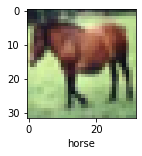

In [9]:
plot_sample(X_train, y_train, 7)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

ANN MODEL

In [38]:
ann = models.Sequential([
        
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(2500, activation='relu'),
    layers.Dense(1500, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [89]:
ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [42]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 146s 92ms/step - loss: 1.8849 - accuracy: 0.3297
Epoch 2/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.6728 - accuracy: 0.3995
Epoch 3/5
1563/1563 [==============================] - 137s 88ms/step - loss: 1.6054 - accuracy: 0.4244
Epoch 4/5
1563/1563 [==============================] - 137s 87ms/step - loss: 1.5665 - accuracy: 0.4373
Epoch 5/5
1563/1563 [==============================] - 138s 89ms/step - loss: 1.5344 - accuracy: 0.4483


In [44]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 21ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.57      0.49      1000
           1       0.54      0.59      0.57      1000
           2       0.33      0.30      0.31      1000
           3       0.34      0.17      0.23      1000
           4       0.39      0.36      0.38      1000
           5       0.32      0.50      0.39      1000
           6       0.58      0.34      0.43      1000
           7       0.54      0.45      0.49      1000
           8       0.46      0.72      0.56      1000
           9       0.60      0.40      0.48      1000

    accuracy                           0.44     10000
   macro avg       0.45      0.44      0.43     10000
weighted avg       0.45      0.44      0.43     10000



In [86]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 1.5638 - accuracy: 0.4409


[1.5637534856796265, 0.4408999979496002]

In [87]:
y_pred = ann.predict(X_test)
y_pred[:5]

313/313 [==============================] - 7s 21ms/step


array([[0.46708328, 0.4666516 , 0.3788515 , 0.5971349 , 0.37982684,
        0.33553192, 0.3278307 , 0.09148922, 0.6591135 , 0.24133211],
       [0.87423754, 0.94734347, 0.09145543, 0.03807367, 0.05600202,
        0.01362723, 0.00481607, 0.03221888, 0.9495524 , 0.9269256 ],
       [0.8756956 , 0.72870576, 0.12607394, 0.08718242, 0.10526103,
        0.04089994, 0.00266968, 0.10861471, 0.95884794, 0.78947806],
       [0.7828118 , 0.45108935, 0.40673703, 0.12393157, 0.33514583,
        0.0926335 , 0.01071755, 0.15354083, 0.9020239 , 0.4993312 ],
       [0.19740242, 0.08361124, 0.7996826 , 0.51085925, 0.893088  ,
        0.59018   , 0.7055195 , 0.27647933, 0.22825362, 0.09962261]],
      dtype=float32)

In [48]:
y_classes = [np.argmax(element) for element in y_pred]

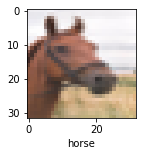

In [55]:
plot_sample(X_test, y_test,99)

In [54]:
classes[y_classes[99]]

'horse'

CNN

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

COMPILATION OF THE MODEL

In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

TRAINING OF THE CNN MODEL

In [36]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.4798 - accuracy: 0.4674
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1286 - accuracy: 0.6028
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9963 - accuracy: 0.6513
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9148 - accuracy: 0.6793
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8516 - accuracy: 0.7027
Epoch 6/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.7992 - accuracy: 0.7240
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7459 - accuracy: 0.7404
Epoch 8/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.7022 - accuracy: 0.7551
Epoch 9/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6607 - accuracy: 0.7694
Epoch 10/10
1563/1563 [==============================] - 36s 23m

In [67]:
from keras.models import load_model
#cnn.save('annproject1.h5')

In [14]:
from keras.models import load_model
loaded_model = load_model("annproject1.h5")

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = loaded_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.81      0.74      1000
           1       0.76      0.83      0.79      1000
           2       0.68      0.49      0.57      1000
           3       0.53      0.51      0.52      1000
           4       0.67      0.60      0.64      1000
           5       0.60      0.63      0.61      1000
           6       0.72      0.81      0.76      1000
           7       0.74      0.77      0.75      1000
           8       0.82      0.78      0.80      1000
           9       0.79      0.73      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [16]:
loaded_model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 9ms/step - loss: 0.9368 - accuracy: 0.6971


[0.9367502927780151, 0.6970999836921692]

In [17]:
y_pred = loaded_model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[5.3353757e-05, 3.4360433e-05, 2.4336561e-05, 9.3526763e-01,
        3.9762934e-05, 6.2665984e-02, 4.0117319e-04, 1.0616613e-04,
        1.4036268e-03, 3.6480708e-06],
       [1.2870802e-03, 5.9926391e-01, 5.6438996e-05, 5.2230496e-07,
        1.8217817e-07, 1.1667767e-07, 4.4908387e-07, 1.5154913e-07,
        3.9790127e-01, 1.4897849e-03],
       [1.0875955e-01, 7.1699786e-01, 1.1480342e-03, 3.4640683e-03,
        6.1841414e-04, 8.2107406e-04, 7.4084924e-04, 2.5710468e-03,
        1.1531218e-01, 4.9566925e-02],
       [9.0734780e-01, 6.4525456e-04, 1.2378589e-02, 1.0148327e-02,
        3.8362953e-03, 2.5029414e-04, 4.5067168e-04, 4.3927989e-04,
        6.4393640e-02, 1.0987990e-04],
       [1.3995085e-05, 1.0697803e-06, 2.7654157e-03, 4.9842246e-02,
        5.9531069e-01, 1.6057132e-02, 3.3562270e-01, 1.6582448e-05,
        3.7022788e-04, 2.8315108e-08]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]


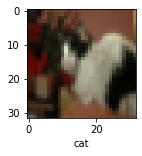

In [24]:
plot_sample(X_test, y_test,78)

In [23]:

classes[y_classes[78]]

'cat'

In [23]:
from ann_visualizer.visualize import ann_viz
ann_viz(loaded_model, view=True, filename="cconstruct_model", title="CNN — Model 1 — Simple Architecture")

In [14]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [15]:
tf.keras.utils.plot_model(loaded_model,to_file ='model.pdf',show_shapes=True)

In [23]:
import keras
from matplotlib import pyplot as plt
history = cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 44s 26ms/step - loss: 1.4838 - accuracy: 0.4647
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1386 - accuracy: 0.6004
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0094 - accuracy: 0.6487
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9318 - accuracy: 0.6753
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8717 - accuracy: 0.6978
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8244 - accuracy: 0.7125
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7824 - accuracy: 0.7279
Epoch 8/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.7432 - accuracy: 0.7430
Epoch 9/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7077 - accuracy: 0.7552
Epoch 10/10
1563/1563 [==============================] - 35s 23m

KeyError: 'acc'

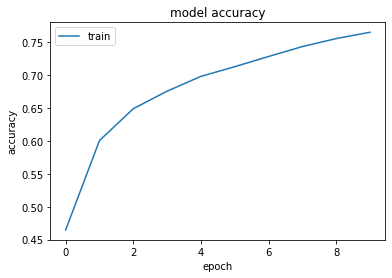

In [29]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

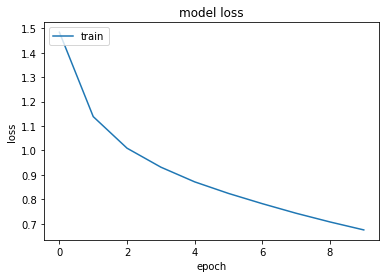

In [30]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()